In [174]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg


import patsy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from patsy.highlevel import dmatrices
from scipy import stats

In [175]:

from scipy import stats

In [176]:
y = np.array([1, 2, 3, 4, 5])
x1 = np.array([6, 7, 8, 9, 10])
x2 = np.array([11, 12, 13, 14, 15])
X = np.vstack([np.ones(5), x1, x2, x1 * x2]).T
X

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [177]:
beta, res, rank, sval = np.linalg.lstsq(X, y, rcond = 0)

In [178]:
data = {"y":y, "x1":x1, "x2":x2}
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data) # dict
X

DesignMatrix with shape (5, 4)
  Intercept  x1  x2  x1:x2
          1   6  11     66
          1   7  12     84
          1   8  13    104
          1   9  14    126
          1  10  15    150
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [179]:
df_data = pd.DataFrame({
    "y": y.ravel(),  # or .flatten()
    "x1": x1,
    "x2": x2,
    "x1:x2": x1 * x2
})


In [180]:
df_data

,y,x1,x2,x1:x2
0,1.0,6,11,66
1,2.0,7,12,84
2,3.0,8,13,104
3,4.0,9,14,126
4,5.0,10,15,150


In [181]:
model = sm.OLS(y, X)
result = model.fit()
result.params

array([-5.55555556e-01,  1.88888889e+00, -8.88888889e-01, -7.77156117e-16])

In [182]:
model = smf.ols("y ~ 1 + x1 + x2 + x1:x2", df_data)
result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -7.771561e-16
dtype: float64

In [183]:
y = np.array([3, 6, 9])
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])


In [184]:
f

NameError: name 'f' is not defined

In [249]:
X

DesignMatrix with shape (5, 4)
  Intercept  x1  x2  x1:x2
          1   6  11     66
          1   7  12     84
          1   8  13    104
          1   9  14    126
          1  10  15    150
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [23]:
from collections import defaultdict
data = defaultdict(lambda: np.array([]))
patsy.dmatrices("y ~ a", data = data)[1].design_info.term_names
['Intercept', 'a']

['Intercept', 'a']

In [24]:
patsy.dmatrices("y ~ 1 + a + b", data = data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [25]:
patsy.dmatrices("y ~ -1 + a + b", data = data)[1].design_info.term_names

['a', 'b']

In [26]:
c = [2, 3, 4]
patsy.dmatrices("y ~ a * b * c ")

(DesignMatrix with shape (3, 1)
   y
   3
   6
   9
   Terms:
     'y' (column 0),
 DesignMatrix with shape (3, 8)
   Intercept  a  b  a:b  c  a:c  b:c  a:b:c
           1  1  4    4  2    2    8      8
           1  2  5   10  3    6   15     30
           1  3  6   18  4   12   24     72
   Terms:
     'Intercept' (column 0)
     'a' (column 1)
     'b' (column 2)
     'a:b' (column 3)
     'c' (column 4)
     'a:c' (column 5)
     'b:c' (column 6)
     'a:b:c' (column 7))

In [27]:
patsy.dmatrices("y~ a * b * c - a:b:c",data = data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c']

In [28]:
data

defaultdict(<function __main__.<lambda>()>,
            {'y': array([], dtype=float64),
             'a': array([], dtype=float64),
             'b': array([], dtype=float64),
             'c': array([], dtype=float64)})

In [29]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}
patsy.dmatrices("y ~ a + b", data = data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [30]:
patsy.dmatrices("y ~ I(a + b)", data = data)[1].design_info.term_names

['Intercept', 'I(a + b)']

In [31]:
patsy.dmatrices("y ~ a**2", data = data)[1].design_info.term_names
patsy.dmatrices("y~ I(a**2)", data = data)[1].design_info.term_names

['Intercept', 'I(a ** 2)']

In [32]:
patsy.dmatrices("y ~ np.log(a) + b", data = data)[1].design_info.term_names

['Intercept', 'np.log(a)', 'b']

In [90]:
z = lambda x1, x2: x1 + x2
patsy.dmatrices("y ~ z(a, b)")[1].design_info.term_names

['Intercept', 'z(a, b)']

In [91]:
data = {"w":[9, 2, 4], "r":[1, 2, 3]}
patsy.dmatrices("w ~ -1 + r", data = data, return_type = "dataframe")[1]

,r
0,1.0
1,2.0
2,3.0


In [94]:
patsy.dmatrices("w ~ -1 + C(r)", data = data, return_type = "dataframe")[1]

,C(r)[1],C(r)[2],C(r)[3]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [98]:
data = {"w":[1, 2, 3], "r":["Bob", "Robert", "Jim"]}
patsy.dmatrices("w~ -1 + C(r)", data = data, return_type = "dataframe")[1]

,C(r)[Bob],C(r)[Jim],C(r)[Robert]
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0


In [102]:
patsy.dmatrices("w ~ -1 + C(r, Poly)", data = data, return_type = "dataframe")[1]

,"C(r, Poly).Constant","C(r, Poly).Linear","C(r, Poly).Quadratic"
0,1.0,-7.071068e-01,0.408248
1,1.0,7.071068e-01,0.408248
2,1.0,-5.551115e-17,-0.816497


In [11]:
import numpy as np
import pandas as pd

N = 100
a1 = np.random.randn(N)
a2 = np.random.randn(N)

# Define the DataFrame using a1 and a2
ddata = pd.DataFrame({"x1": a1, "x2": a2})

# Define the true function
def t_true(a1, a2):
    return 1 + 2 * a1 + 3 * a2 + 4 * a1 * a2

# Apply the function using the correct variables
ddata["t_true"] = t_true(a1, a2)


In [125]:
e = 0.5 * np.random.randn(N)
ddata["t"] = ddata['t_true'] + e

In [130]:
model = smf.ols("t ~ x1 + x2", ddata)
result = model.fit()

In [133]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      t   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     60.47
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           8.90e-18
Time:                        01:33:53   Log-Likelihood:                -272.43
No. Observations:                 100   AIC:                             550.9
Df Residuals:                      97   BIC:                             558.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9795      0.376      2.604      0.011       0.233       1.726
x1             2.8654      0.408      7.023      0.000       2.056       3.675
x2             3.0817      0.360      8.569      0.000       2.368       3.796
==============================================================================
Omnibus:                       26.891   Durbin-Watson:                   2.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.921
Skew:                          -0.970   Prob(JB):                     2.17e-14
Kurtosis:                       6.367   Cond. No.                         1.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

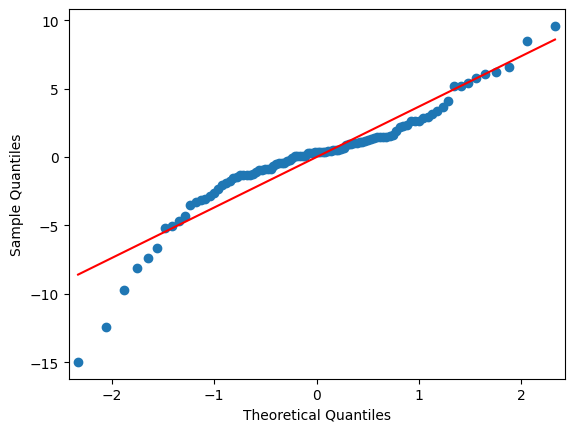

In [138]:
from statsmodels.graphics.gofplots import qqplot
qqplot(result.resid, line = 's')
import matplotlib.pyplot as plt
plt.show()
# Check for normal dist

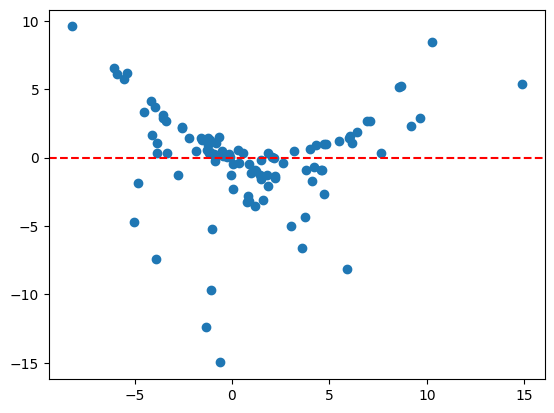

In [145]:
resid = result.resid
fitted = result.fittedvalues

plt.scatter(fitted, resid)
plt.axhline(0, color = 'red', linestyle = '--')
## Check for heteroscedasticity

[]

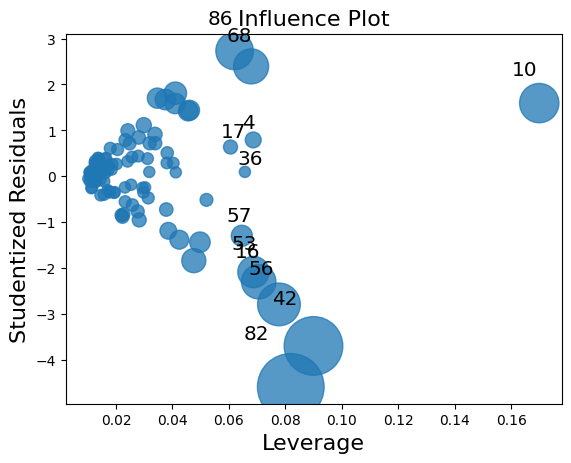

In [150]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(result)
plt.plot()

[]

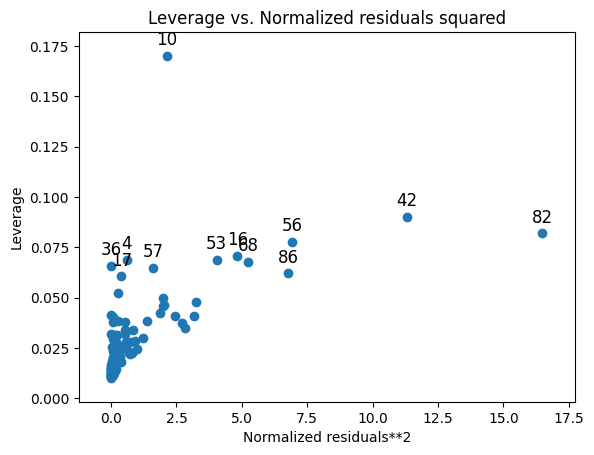

In [151]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plot_leverage_resid2(result)
plt.plot()

[]

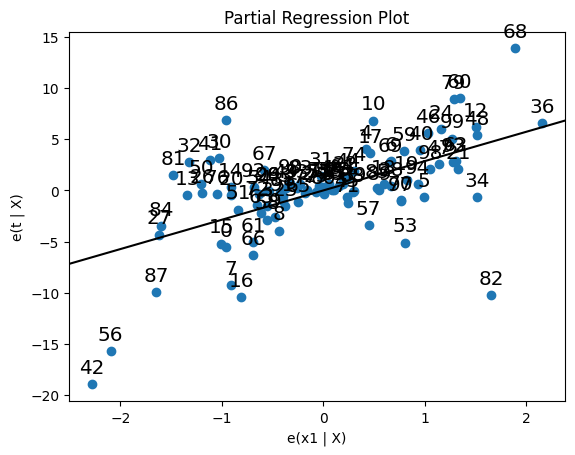

In [163]:
from statsmodels.graphics.regressionplots import plot_partregress
plot_partregress(endog = 't', exog_i='x1', exog_others=['x2'], data = ddata)
plt.plot()

/Users/macbook/Documents/MYSpace/FinPy/.venv/lib/python3.10/site-packages/statsmodels/graphics/regressionplots.py:1267: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_params = results.params[ii]


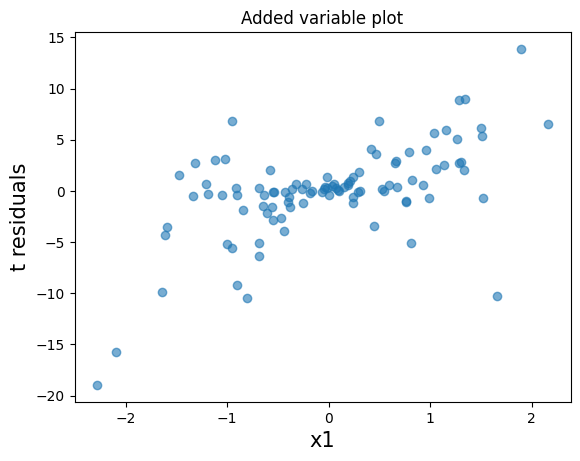

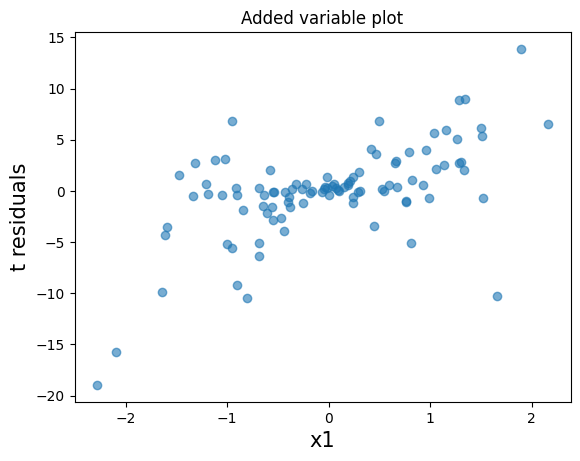

In [178]:
from statsmodels.graphics.regressionplots import plot_added_variable
plot_added_variable(result, 'x1', )

<Axes: >

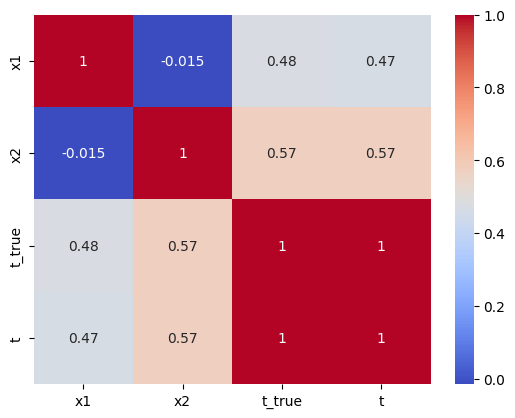

In [181]:
import seaborn as sns

sns.heatmap(ddata.corr(), annot = True, cmap = 'coolwarm')

[]

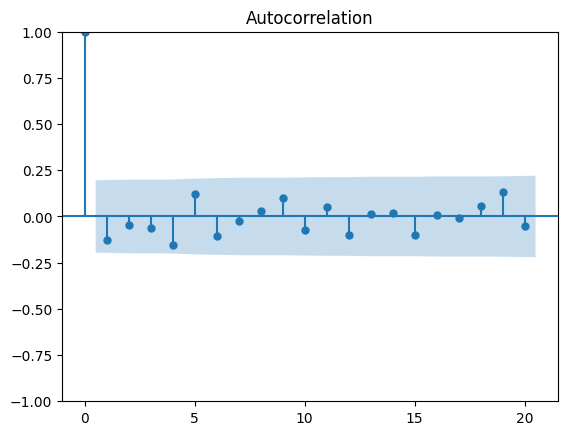

In [193]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(result.resid)
plt.plot()

[]

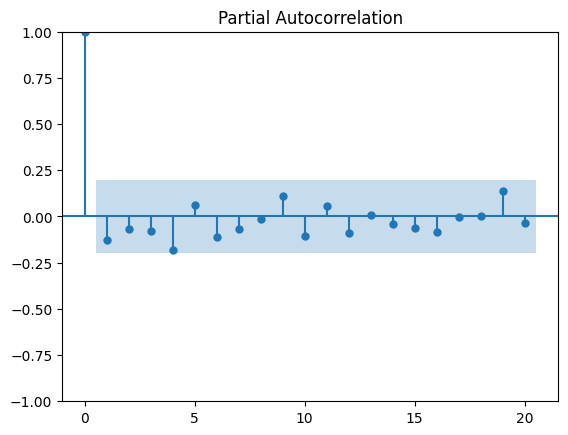

In [192]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(result.resid)
plt.plot()

/var/folders/32/x9dgly0d26z5yqyvl8t2zw3c0000gn/T/ipykernel_11971/2360958155.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time = pd.date_range(start="2020-01", periods=48, freq="M")


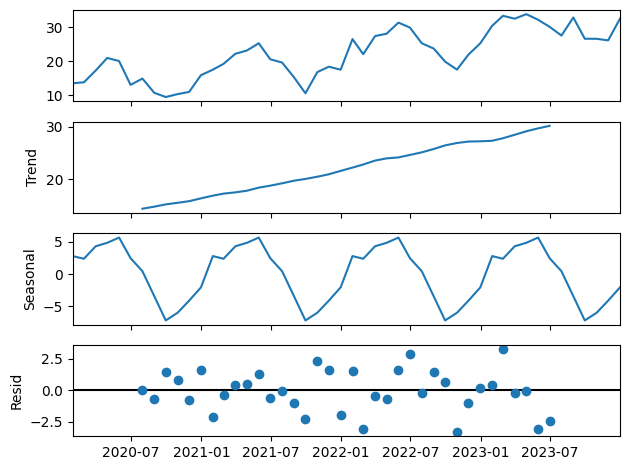

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Example: Simulated seasonal data
np.random.seed(0)
time = pd.date_range(start="2020-01", periods=48, freq="M")
data = 10 + 0.5 * np.arange(48) + 5 * np.sin(2 * np.pi * np.arange(48) / 12) + np.random.normal(scale=2, size=48)
series = pd.Series(data, index=time)

# Decompose the series
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
plt.tight_layout()
plt.show()


In [200]:
model = smf.ols("t ~ x1 + x2", ddata)
result = model.fit()
result.rsquared

0.5549180959503566

In [201]:
result.resid.head()

0   -2.827294
1    0.481783
2    0.458771
3    0.069283
4    2.870330
dtype: float64

In [202]:
z, p = stats.normaltest(result.fittedvalues.values)
p

0.04368907779513149

[]

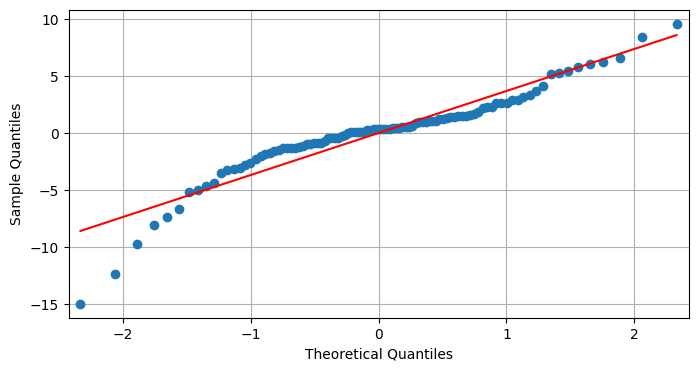

In [205]:
fig, ax = plt.subplots(figsize = (8, 4))
smg.qqplot(result.resid, ax = ax, line='s')
plt.grid()
plt.plot()

In [209]:
model = smf.ols("t ~ x1 + x2 + x1*x2", ddata)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      t   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     5648.
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          8.62e-108
Time:                        02:12:15   Log-Likelihood:                -53.955
No. Observations:                 100   AIC:                             115.9
Df Residuals:                      96   BIC:                             126.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9917      0.043     23.312      0.0

In [211]:
result.rsquared

0.9943657822848737

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

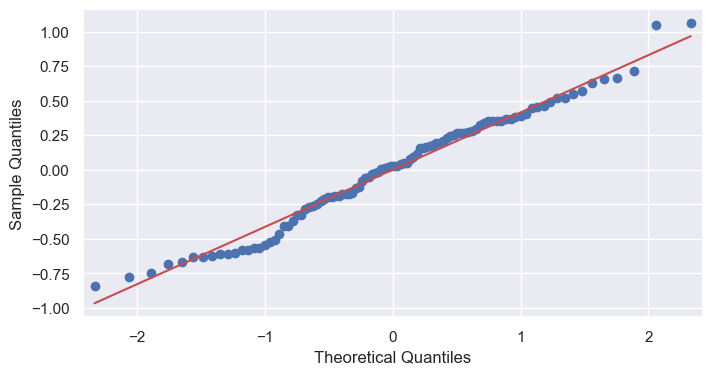

In [219]:
z, p = stats.normaltest(result.fittedvalues.values)
p
sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots(figsize = (8, 4))
smg.qqplot(result.resid, ax = ax, line = 's')
plt.grid(True)
plt.plot

In [220]:
result.params

Intercept    0.991712
x1           1.963272
x2           3.020603
x1:x2        4.045278
dtype: float64

In [221]:
x = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x, x)

In [224]:
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})

In [225]:
y_pred = result.predict(new_data)

In [228]:
y_pred.shape

(2500,)

In [229]:
y_pred = y_pred.values.reshape(50, 50)

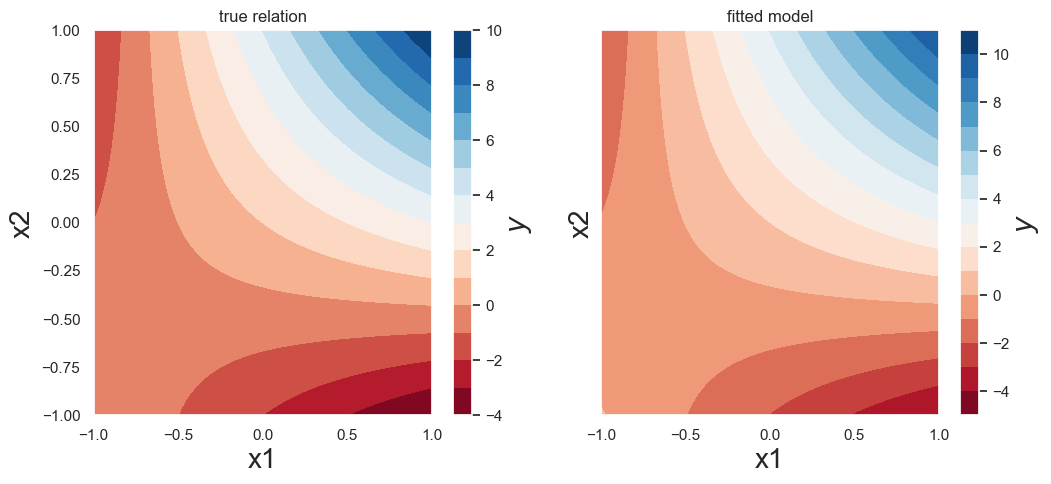

In [233]:
fig, axes =plt.subplots(1, 2, figsize = (12, 5), sharey = True)
def plot_y_contour(ax, Y, title):
    x = ax.contourf(X1, X2, Y, 15, cmap = plt.cm.RdBu)
    ax.set_xlabel(r"x1", fontsize = 20)
    ax.set_ylabel(r"x2", fontsize = 20)
    ax.set_title(title)
    cb = fig.colorbar(x, ax = ax)
    cb.set_label(r"$y$", fontsize = 20)

plot_y_contour(axes[0], t_true(X1, X2), 'true relation')
plot_y_contour(axes[1], y_pred, 'fitted model')


In [235]:
result

In [281]:
import numpy as np
import pandas as pd
import patsy
import statsmodels.api as sm

# Sample data
np.random.seed(0)
a = np.random.randn(100)
b = np.random.randn(100)
c = a**2 + b**2
y = 3*a + 2*b + 0.5*c + np.random.randn(100)  # Some response

# Create DataFrame for patsy
data = pd.DataFrame({"y": y, "a": a, "b": b, "c": c})

# Use patsy to get y and X
y, X = patsy.dmatrices("y ~ a + b + c", data)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     615.6
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           1.55e-62
Time:                        03:01:05   Log-Likelihood:                -136.57
No. Observations:                 100   AIC:                             281.1
Df Residuals:                      96   BIC:                             291.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0710      0.154     -0.460      0.6

(array([ 1.,  0.,  1.,  2.,  3.,  2.,  2.,  5.,  3., 15.,  9.,  9., 13.,
         5., 10.,  7.,  4.,  3.,  1.,  1.,  2.,  2.]),
 array([-2.72436957, -2.49314086, -2.26191216, -2.03068345, -1.79945474,
        -1.56822603, -1.33699732, -1.10576862, -0.87453991, -0.6433112 ,
        -0.41208249, -0.18085379,  0.05037492,  0.28160363,  0.51283234,
         0.74406105,  0.97528975,  1.20651846,  1.43774717,  1.66897588,
         1.90020458,  2.13143329,  2.362662  ]),
 <BarContainer object of 22 artists>)

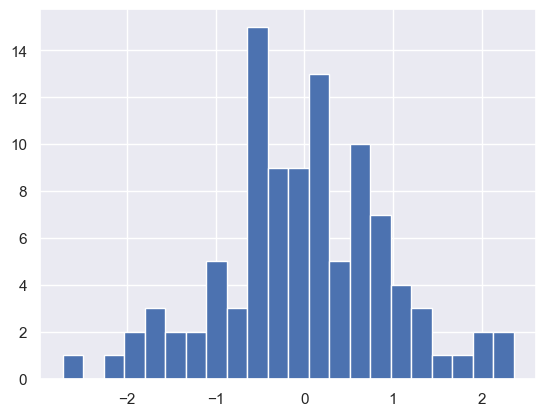

In [285]:
plt.hist(model.resid, bins = 22)

In [282]:
z = lambda x1, x2: x1**2 + x2**2
patsy.dmatrices("y ~ x1 + x2 + z(x1, x2)")

PatsyError: Number of rows mismatch between y and x1 (100 versus 5)
    y ~ x1 + x2 + z(x1, x2)
        ^^

In [290]:
x1 = x2 = 3
pred = model.predict([x1, x2])

plt.plot(model['x1'], pred)

ValueError: shapes (1,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)

In [323]:
N = 200
x1 = np.random.randn(N)
x2 = np.random.randn(N)
x3 = x1**2 + x2**2 + np.random.normal(0, 0.2, N)
y = 1 + 2*x1 + 0.5*x2 + 3*x1*x2 + 1.5*x3 + np.random.normal(0, 1, N)


data = pd.DataFrame({"y":y, 'x1':x1, 'x2':x2, 'x3':x3})
y, X= patsy.dmatrices("y ~ x1 + x2 + x1:x2 + I(x1**2 + x2**2)", data)

model = sm.OLS(y, X).fit()
result = model.summary()

if model.pvalues[3] <= 0.05:
    print("x1:x2 is significant")
z, p = stats.normaltest(model.resid)


x1:x2 is significant


In [33]:
# Ecample dataset

dataset = sm.datasets.get_rdataset('Icecream', "Ecdat")

In [34]:
dataset.title

'Ice Cream Consumption'

In [35]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cons    30 non-null     float64
 1   income  30 non-null     int64  
 2   price   30 non-null     float64
 3   temp    30 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.1 KB


[]

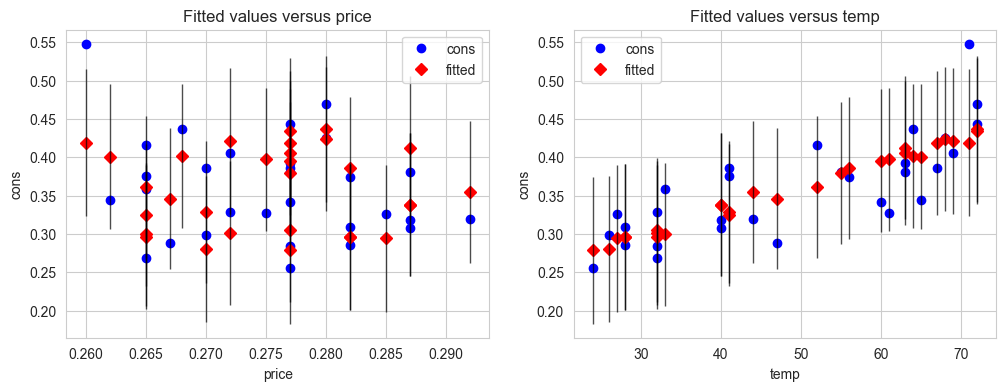

In [39]:
model = smf.ols("cons ~ -1  + price + temp", data = dataset.data)
result = model.fit()\


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
smg.plot_fit(result, 0, ax = ax1)
smg.plot_fit(result, 1, ax = ax2)
plt.plot()

In [40]:
df = sm.datasets.get_rdataset('iris').data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [59]:
df_subset = df(df.Species.isin(["versicolor", "virginica"]))
df_subset.Species = df_subset.Species.map({"versicolor": 1, "virginica":0})

df_subset.rename(columns = {"Sepal.Length": "Sepal_Length",
                            "Sepal,Width": " Sepal_Width",
                            "Petal.Length": "Petal_Length",
                            "Petal.Width": "Petal_Width"},
                            inplace = True)

SyntaxError: '(' was never closed (3667663336.py, line 4)

In [61]:
df_subset = df[df['Species'].isin(["versicolor", "virginica"])].copy()

df_subset['Species'] = df_subset['Species'].map({"versicolor": 1, "virginica": 0})

df_subset.rename(columns={
    "Sepal.Length": "Sepal_Length",
    "Sepal.Width": "Sepal_Width",  # corrected typo: was "Sepal,Width"
    "Petal.Length": "Petal_Length",
    "Petal.Width": "Petal_Width"
}, inplace=True)


In [65]:
model = smf.logit("Species ~ Petal_Length + Petal_Width", data =df_subset)

result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 17 Jun 2025   Pseudo R-squ.:                  0.8517
Time:                        05:07:14   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 2.303e-26
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001      18.594      71.951
Petal_Length    -5.7545      2.306     -2.496      0.013     -10.274      -1.235
Petal_Width    -10.4467      3.756     -2.782      0.005     -17.808      -3.086
================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [66]:
result.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                Species
Method:                          dydx
At:                           overall
================================================================================
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Petal_Length    -0.1736      0.052     -3.347      0.001      -0.275      -0.072
Petal_Width     -0.3151      0.068     -4.608      0.000      -0.449      -0.181
================================================================================
"""

In [102]:
df_new = pd.DataFrame({"Petal_Length": np.random.randn(50)* 0.5 + 5,
                       "Petal_Width": np.random.randn(50)* 0.5 + 1.7})
df_new["P-Species"] = result.predict(df_new)

In [103]:

df_new['P-Species'].head(3)

0    0.429342
1    0.765804
2    0.697202
Name: P-Species, dtype: float64

In [104]:
df_new['Species'] = (df_new["P-Species"] > 0.5).astype(int)
params = result.params
alpha0 = -params['Intercept'] / params['Petal_Width']
alpha1 = -params['Petal_Length'] / params['Petal_Width']

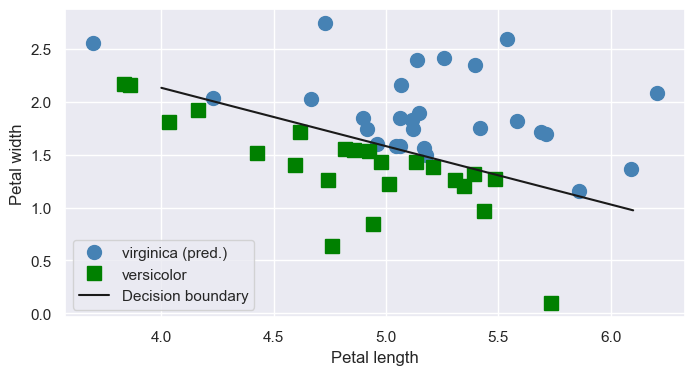

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Subsets
subset1 = df_new[df_new["Species"] == 0]  # virginica
subset2 = df_new[df_new["Species"] == 1]  # versicolor

# Plotting points
ax.plot(subset1["Petal_Length"], subset1["Petal_Width"],
        'o', markersize=10, color="steelblue", label='virginica (pred.)')

ax.plot(subset2["Petal_Length"], subset2["Petal_Width"],
        's', markersize=10, color="green", label='versicolor')

# Boundary line (make sure alpha0 and alpha1 are defined before this)
_x = np.array([4.0, 6.1])
ax.plot(_x, alpha0 + alpha1 * _x, 'k-', label='Decision boundary')

# Labels, legend, and show
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
plt.show()


In [95]:
df_new

,Petal_Length,Petal_Width,P-Species,Species
0,4.699651,1.502006,9.266982e-01,1
1,5.535505,1.333661,3.741978e-01,0
2,5.974029,2.610116,7.753763e-08,0
3,5.379108,1.661067,4.588795e-02,0
4,5.038368,1.959382,1.491759e-02,0
5,4.747856,1.816920,2.630526e-01,0
6,4.301012,1.871370,7.255966e-01,1
7,5.419755,1.462320,2.328599e-01,0
8,3.376639,1.480419,9.999688e-01,1
9,4.781841,1.494518,8.949480e-01,1


In [123]:
dataset = sm.datasets.get_rdataset('discoveries')
df = dataset.data.set_index("time").rename(columns = {"value":"discoveries"})
df.head(10).T

time,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869
discoveries,5,3,0,2,0,3,2,3,6,1


<Axes: xlabel='time'>

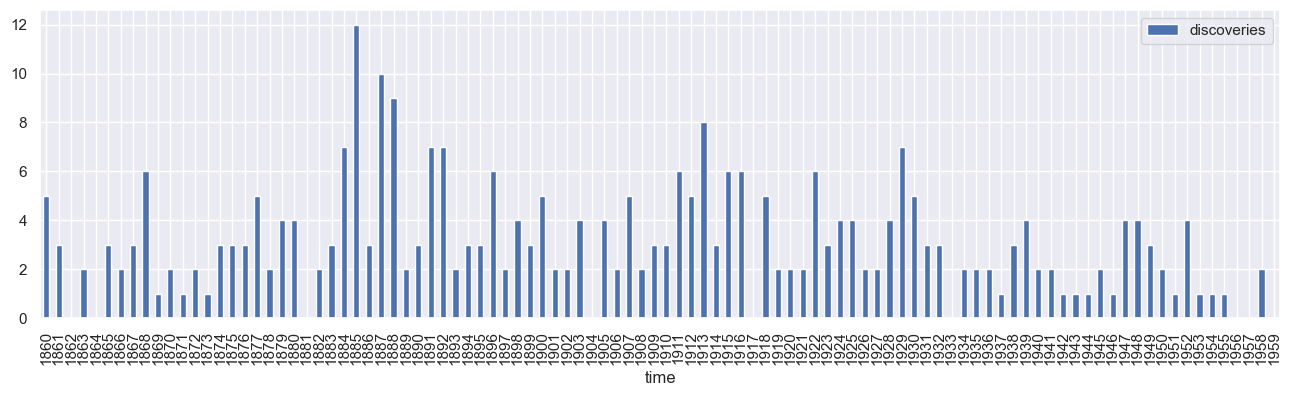

In [124]:
fig, ax = plt.subplots(1, 1, figsize = (16, 4))
df.plot(kind = 'bar', ax = ax)

In [127]:
model = smf.poisson("discoveries ~ 1", data = df)

result = model.fit()


result.summary()

Optimization terminated successfully.
         Current function value: 2.168457
         Iterations 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:            discoveries   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Jun 2025   Pseudo R-squ.:                   0.000
Time:                        05:47:03   Log-Likelihood:                -216.85
converged:                       True   LL-Null:                       -216.85
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1314      0.057     19.920      0.000       1.020       1.243
==============================================================================
"""

In [128]:
lmbda = np.exp(result.params)

In [129]:
X = stats.poisson(lmbda)

In [138]:
result.conf_int()

,0,1
Intercept,1.020084,1.242721


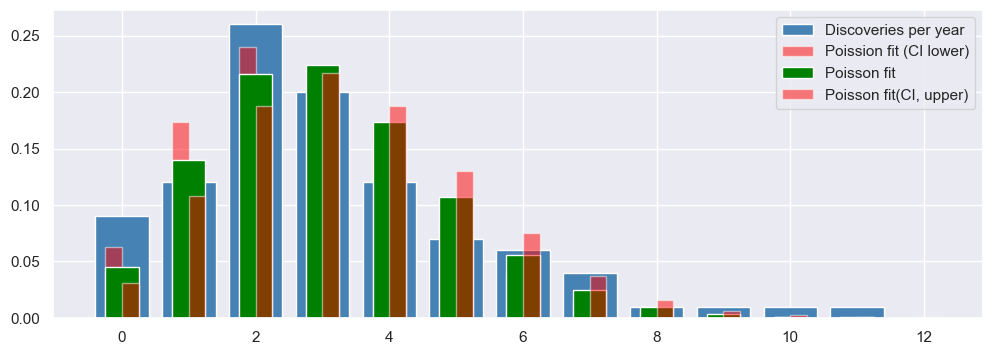

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming `result` is from statsmodels Poisson regression
lower_bound = result.conf_int().values[0, 0]
upper_bound = result.conf_int().values[0, 1]

# Get the Poisson distributions from the confidence interval bounds
X_ci_1 = stats.poisson(mu=np.exp(lower_bound))
X_ci_u = stats.poisson(mu=np.exp(upper_bound))

# Histogram of your data
v, k = np.histogram(df.values, bins=12, range=(0, 12), density=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(k[:-1], v, color="steelblue", align='center', label="Discoveries per year")
ax.bar(k - 0.125, X_ci_1.pmf(k), color = 'red', alpha = 0.5, align = 'center', width = 0.25,
       label = 'Poission fit (CI lower)')
ax.bar(k, X.pmf(k), color = 'green', align = 'center', width = 0.5,label = 'Poisson fit')

ax.bar(k + 0.125, X_ci_u.pmf(k), color = "red", alpha = 0.5, align='center', width =0.25,
       label = 'Poisson fit(CI, upper)')
# Optional: overlay Poisson PMF
ax.legend()

In [166]:
df = pd.read_csv('Indoor Temperature 2014.tsv', sep = '\t', names =['time', 'temp'])
df['time'] = pd.to_datetime(df['time'], unit = 's')
df = df.set_index('time').resample('h').mean()
df_march = df[df.index.month ==3]
df_april = df[df.index.month == 4]
df

,temp
time,
2013-12-31 23:00:00,22.000000
2014-01-01 00:00:00,22.343333
2014-01-01 01:00:00,22.510000
2014-01-01 02:00:00,22.571667
2014-01-01 03:00:00,22.678333
...,...
2014-12-30 18:00:00,11.530000
2014-12-30 19:00:00,11.580000
2014-12-30 20:00:00,11.720000


In [199]:
model = sm.tsa.AutoReg(df_march.temp,lags = 72,  old_names = False)
result = model.fit()

In [203]:
sm.stats.durbin_watson(result.resid)


1.9995993209784932

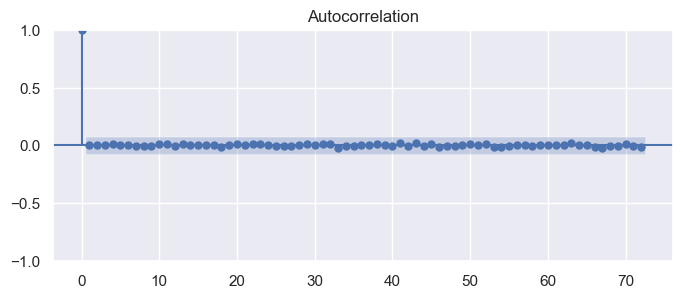

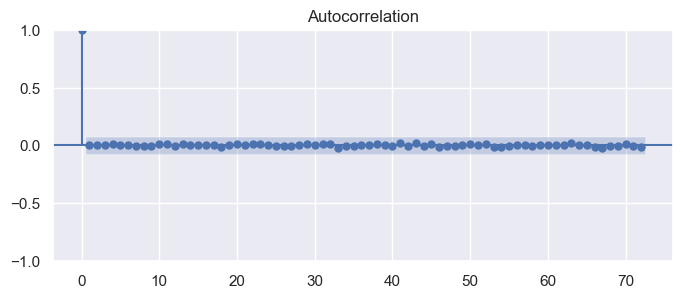

In [204]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
smg.tsa.plot_acf(result.resid, lags = 72, ax = ax)



In [3]:
model = sm.tsa.AR(df_march.temp)

NameError: name 'sm' is not defined

In [4]:
result = model.fit(72)

NameError: name 'model' is not defined

In [5]:
sm.stats.durbin_watson(result.resid)

NameError: name 'sm' is not defined

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
stg.tsa.plot_acf(result.resid, lags = 72, ax = ax)

In [ ]:
temp_3d_forcast = result.predict('2014-04-01', '2014-04-04')
